# Hands-on Exercise for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv
    
Description of the data is provided at http://math.furman.edu/~dcs/courses/math47/R/library/car/html/Davis.html

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> Based on the data description, ware the data points and what are the attributes in this data? <br>

<span style="color:green">Answer:</span> 

There is a binary "sex" attribute, two integer datatype variables "weight" and "height", and two other variables of float datatype

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study? <br>

<span style="color:green">Answer:</span> 

Men and women who engage in regular exercise

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [22]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=0)

In [24]:
davis_df.dropna(inplace=True);

 <span style="color:green">Answer:</span>

In [25]:
len(davis_df)

181

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span>

In [26]:
len(davis_df.columns)

5

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

 <span style="color:green">Answer:</span>
 

In [30]:
davis_df.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


There is one binary categorical attribute, two integer attributes, and two float attributes

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [ ]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

 <span style="color:green">Answer:</span>

In [31]:
df.describe()

,weight,height,repwt,repht
count,200.000000,200.000000,183.000000,183.000000
mean,65.800000,170.020000,65.622951,168.497268
std,15.095009,12.007937,13.776669,9.467048
min,39.000000,57.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.500000
50%,63.000000,169.500000,63.000000,168.000000
75%,74.000000,177.250000,73.500000,175.000000
max,166.000000,197.000000,124.000000,200.000000


The range of weight is between 39 and 166, the range of height is between 57 and 197, the range of repwt is between 41 and 124, the range of repht is between 148 and 200

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

 <span style="color:green">Answer:</span> 

In [34]:
df['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [37]:
df.mean()

weight     65.800000
height    170.020000
repwt      65.622951
repht     168.497268
dtype: float64

<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [41]:
df.var()

weight    227.859296
height    144.190553
repwt     189.796613
repht      89.624992
dtype: float64

<span style="color:red">**Question 2e:** </span> Visually examine how the attribute 'weight' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

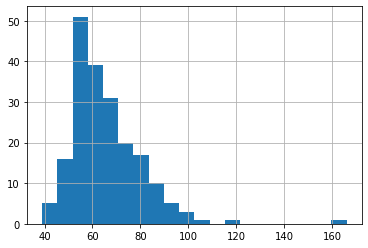

In [43]:
df['weight'].hist(bins=20)

 <span style="color:green">Answer:</span> 

It does not appear to be gaussian, but it appears to be closer to gaussian than uniform

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute 'height' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

 <span style="color:green">Answer:</span>  

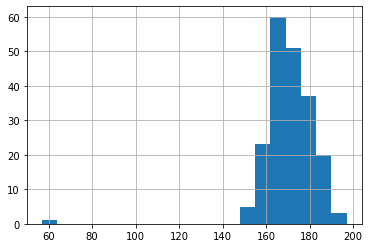

In [44]:
df['height'].hist(bins=20)

It is much closer to a gaussian than weight 

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute 'repwt' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

 <span style="color:green">Answer:</span>  

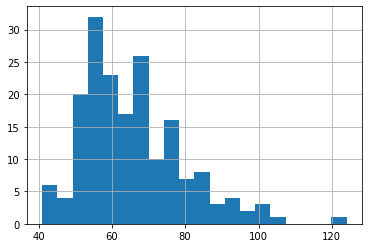

In [45]:
df['repwt'].hist(bins=20)

It is closer to a gaussian than uniform, but i would be reluctant to even call this a skewed gaussian

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute 'repht' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

 <span style="color:green">Answer:</span>  

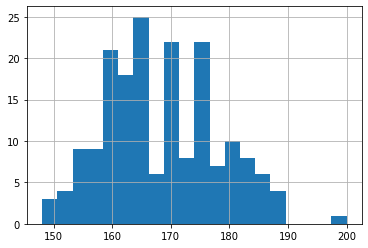

In [46]:
df['repht'].hist(bins=20)

This one is somewhere between uniform and gausian in my opinion, but due to the lack of points >190, i will say it is closer to gaussian

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute 'sex' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution? 

In [47]:
df['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

I do not believe a gaussian distribution is applicable to binary variables, so i will say it is uniform

 <span style="color:green">Answer:</span>  

<span style="color:red">**Question 2j:** </span> Is it possible for attribute 'sex' to follow a Gaussian distribution? Support your answer with a rationale. 

It does not make sense to specify a binary variable with a continuous distribution, unless you round, which makes it not a continuous distribution in the first place

### 3. Geometric and Probabilistic view

<span style="color:brown">**Note:** </span> For this part, we will restrict to 'repwt' and 'repht' attributes in the davis dataset as we can only visualize 2D space.

In [48]:
davis_df_new = davis_df[['repwt','repht']]

In [ ]:
davis_df_new.head()

<span style="color:red">**Question 3a:** </span> Show the Geometric view of this data 'davis_df_new' on a 2D space along with the mean. 

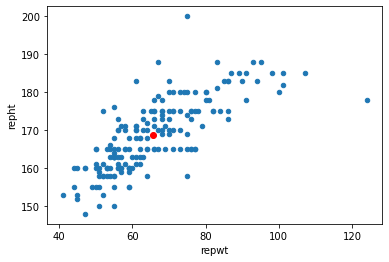

In [62]:
davis_df_new.plot('repwt', 'repht', kind='scatter')
plt.scatter(*davis_df_new.mean()[['repwt', 'repht']], color='red')

<span style="color:red">**Question 3b:** </span> From the geometric view, state your observations about the data and any relationships you observe between the attributes. 

They appear to be positively correlated

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [63]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [ ]:
davis_df_new_row_norm[1:10,:]

<span style="color:red">**Question 3c:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

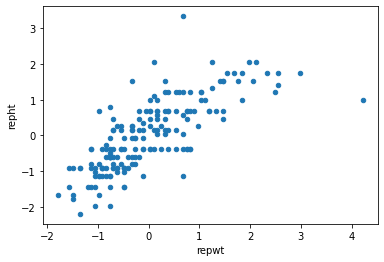

In [84]:
test = (davis_df_new - davis_df_new.mean())/davis_df_new.std()
test.plot('repwt', 'repht', kind='scatter')

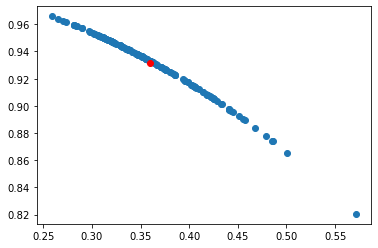

In [76]:
plt.scatter(davis_df_new_row_norm[:, 0], davis_df_new_row_norm[:, 1])
plt.scatter(*np.mean(davis_df_new_row_norm, axis=0), color='red')

 <span style="color:green">Answer:</span> 

<span style="color:red">**Question 3d:** </span> Comment on the new geomateric view of the data in comparison to the view you observed in Question 3b. Provide a reason for the difference in the two geometric views.

 <span style="color:green">Answer:</span> The correlation now appears to be negative, and there is far less noise. I have absolutely no idea why this looks so dramatically different from the original view

<span style="color:red">**Question 3e:** </span> Show the Probabilistic view of the data davis_df_new.

In [205]:
from scipy.stats import multivariate_normal

xx, yy = np.meshgrid(
    np.linspace(davis_df_new.min()['repwt'], davis_df_new.max()['repwt'], 181),
    np.linspace(davis_df_new.min()['repht'], davis_df_new.max()['repht'], 181),
)

In [210]:
zz = np.dstack((xx, yy))
F = multivariate_normal(davis_df_new.mean().values, davis_df_new.cov().values)
Z = F.pdf(zz)

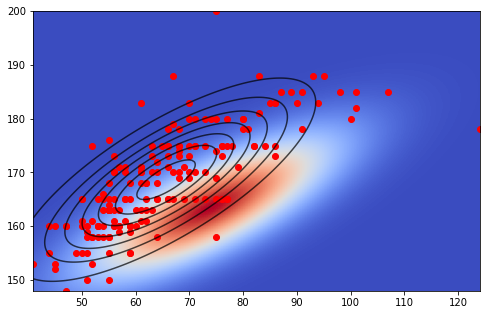

In [211]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[davis_df_new.min()['repwt'], davis_df_new.max()['repwt'], davis_df_new.min()['repht'],davis_df_new.max()['repht']])
cset = ax.contour(xx, yy, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new['repwt'], davis_df_new['repht'], color='red')
plt.show()

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [212]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [ ]:
davis_df_new_col_norm[1:10,:]

<span style="color:red">**Question 3f:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. 

In [221]:
xx, yy = np.meshgrid(
    np.linspace(davis_df_new_col_norm[:, 0].min(), davis_df_new_col_norm[:, 0].max(), 181),
    np.linspace(davis_df_new_col_norm[:, 1].min(), davis_df_new_col_norm[:, 1].max(), 181),
)

zz = np.dstack((xx, yy))
F = multivariate_normal(davis_df_new_col_norm.mean(axis=0), np.cov(davis_df_new_col_norm.T))
Z = F.pdf(zz)

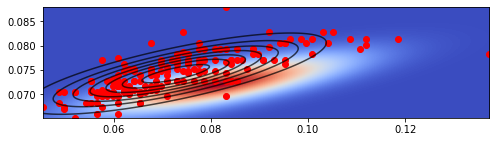

In [231]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[davis_df_new_col_norm[:, 0].min(), davis_df_new_col_norm[:, 0].max(), davis_df_new_col_norm[:, 1].min(), davis_df_new_col_norm[:, 1].max()])
cset = ax.contour(xx, yy, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new_col_norm[:, 0], davis_df_new_col_norm[:, 1], color='red')
plt.show()

<span style="color:green">Answer:</span>  

<span style="color:red">**Question 3g:** </span> Compare the shape of the covariance structure in Question 3f with that of Question 3e and comment if column normalization has affected the shape of the covariance structure.

In [233]:
davis_df_new.cov().values

array([[191.38563536,  99.01740331],
       [ 99.01740331,  88.25979128]])

In [248]:
np.cov(davis_df_new_col_norm.T)*1000000

array([[234.75756501,  48.25616617],
       [ 48.25616617,  17.08973006]])

<span style="color:green">Answer:</span> After multiplying by a constant factor to get a covariance matrix roughly on the same scale after normalizing, we see the off-diagonal is the same just as before, but the $\Sigma_{1,1}$ element is an order of magnitude larger than the $\Sigma_{2,2}$ element, which was not the case before normalizing. 

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> Compute the covariance matrix.

In [272]:
numerical_features = df[['weight', 'height', 'repwt', 'repht']].dropna().values
means = numerical_features.mean(axis=0)

cov = np.dot((numerical_features-means).T, (numerical_features-means))/180

In [273]:
cov

array([[235.34604052,  29.13606507, 177.29235727,  91.00466544],
       [ 29.13606507, 151.58704727, 102.83317986,  85.49772867],
       [177.29235727, 102.83317986, 191.38563536,  99.01740331],
       [ 91.00466544,  85.49772867,  99.01740331,  88.25979128]])

In [274]:
cov/df[['weight', 'height', 'repwt', 'repht']].dropna().cov()

,weight,height,repwt,repht
weight,1.0,1.0,1.0,1.0
height,1.0,1.0,1.0,1.0
repwt,1.0,1.0,1.0,1.0
repht,1.0,1.0,1.0,1.0


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> it looks like none of them do?



<span style="color:red">**Question 4c:** </span> Compute the correlation matrix.

In [316]:
diag = np.linalg.inv(np.sqrt(np.eye(4)*cov))

In [318]:
corr = np.dot(np.dot(diag, cov), diag)

In [319]:
corr

array([[1.        , 0.15425754, 0.83537581, 0.63143516],
       [0.15425754, 1.        , 0.60373666, 0.73916617],
       [0.83537581, 0.60373666, 1.        , 0.76186043],
       [0.63143516, 0.73916617, 0.76186043, 1.        ]])

In [320]:
df[['weight', 'height', 'repwt', 'repht']].dropna().corr()/corr

,weight,height,repwt,repht
weight,1.0,1.0,1.0,1.0
height,1.0,1.0,1.0,1.0
repwt,1.0,1.0,1.0,1.0
repht,1.0,1.0,1.0,1.0


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are highly correlated? Clearly specify the highly positive and highly negatively correlated attributes.

<span style="color:green">Answer: </span> They all appear to be positively correlated. Highest 3 positive correlations are weight/repwt, repwt/repht, and height/repht


<span style="color:red">**Question 4e:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span> It appears that height and weight are uncorrelated

<span style="color:red">**Question 4f:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> The precise ordering of linear dependency between pairs

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [322]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

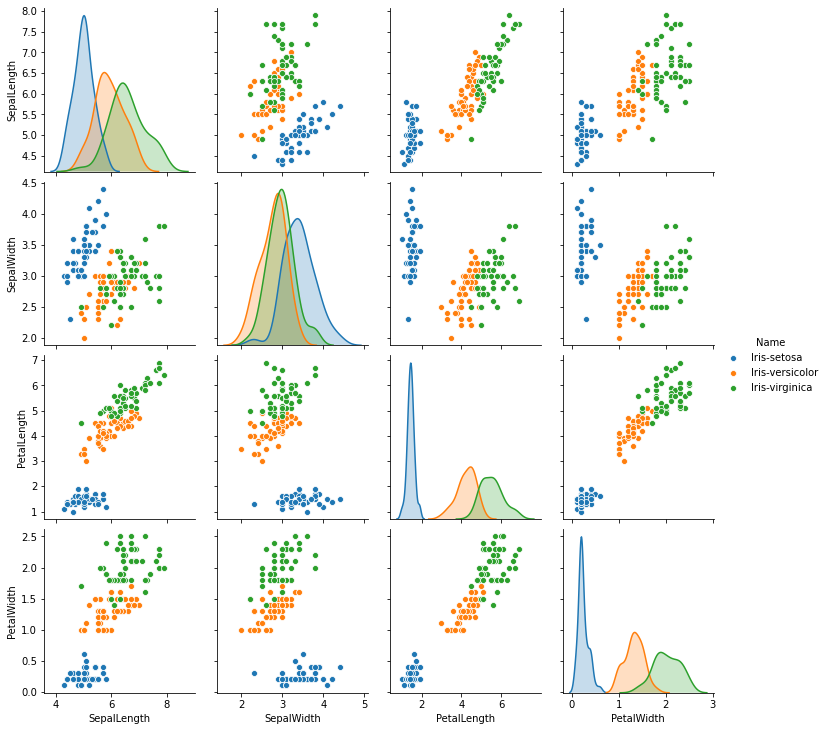

In [323]:
import seaborn as sns
sns.pairplot(iris_df, hue="Name")

<span style="color:green">Answer:</span> Pedal width, it appears to be the most separable 

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> Probaby sepal width / pedal width, they appear to have the most separable class clusters

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> Perhaps you could drop features that have a high average correlation with other features. If your covariance matrix has a column that has an average of .9, you may not lose a whole lot. Although this may actually make things worse. If there is a good way to do unsupervised feature selection, i am not aware of it

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [326]:
iris = iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].values

In [330]:
cov_matrix = np.dot((iris - iris.mean(axis=0)).T, (iris - iris.mean(axis=0)))

In [332]:
Lambda, v = np.linalg.eig(cov_matrix)

In [335]:
pca = np.matmul(iris, v[:, :2])

In [343]:
np.dot((pca - pca.mean(axis=0)).T, (pca - pca.mean(axis=0))).round(8)

array([[629.50127448,   0.        ],
       [  0.        ,  36.09429217]])

<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

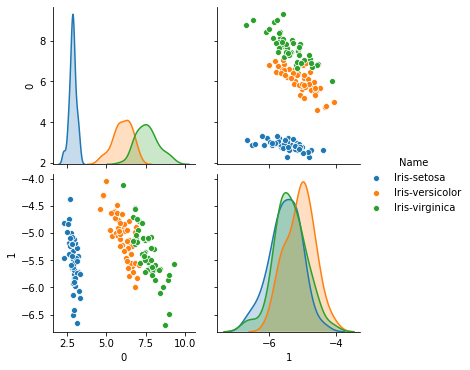

In [339]:
df = pd.DataFrame(pca)
df['Name'] = iris_df['Name']
sns.pairplot(df, hue="Name")

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 5a?

<span style="color:green">Answer:</span> The first one, because that has the most variance, because thats what PCA does. It looks suspiciusly similar to the one in 5a, but it is indeed different.

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 5b?

<span style="color:green">Answer:</span> It is difficult to say conclusively, but I would say they are at least tied, the PCA may be better

<span style="color:red">**Question 6e:** </span> In general, are principal components guaranteed to be more informative than the original features for the data mining task at hand?

<span style="color:green">Answer:</span> More informative - that does not seem right to me. But if you wonder if they are at least as informative, i say probably

<span style="color:red">**Question 6f:** </span>In real-world problems ground-truth (types of iris plants) will not be available to determine if the principal compoents or original features are better suited for the data mining task at hand. How should one proceed with the data mining task?

<span style="color:green">Answer:</span> You can just use the eigenvalues obtained from pca to determine how much variance you lose, and choose an appropriate threshold

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [344]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [345]:
Blobs_X.shape

(1500, 2)

Text(0.5, 1.0, 'Blobs')

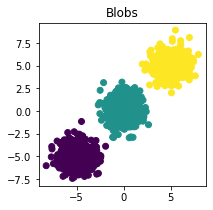

In [346]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [347]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,0.234771
1,-3.534351,-5.225776,-0.695000
2,-6.525525,-5.691908,-2.165020
3,-0.120948,0.419532,-0.632101
4,-5.469474,-4.457440,0.036382


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [348]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,-16.689814
1,-3.534351,-5.225776,16.054359
2,-6.525525,-5.691908,-7.647357
3,-0.120948,0.419532,3.230608
4,-5.469474,-4.457440,27.093785


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [349]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-21.914047,2.087958
1,-3.534351,-5.225776,-5.403548,8.033524
2,-6.525525,-5.691908,-11.539215,-2.243414
3,-0.120948,0.419532,0.204731,-3.603993
4,-5.469474,-4.457440,2.310597,9.758888


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

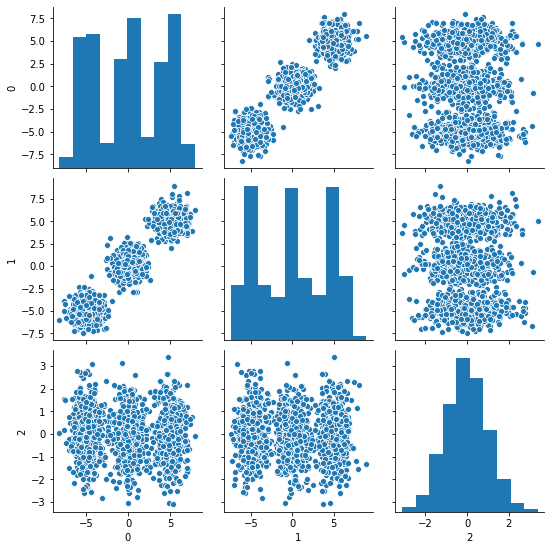

In [352]:
sns.pairplot(Blobs1)

<span style="color:green">Answer:</span> The third attribute seems to have something close to a standard normal distribution. I am not sure this will be useful for classification

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [353]:
blob = Blobs1.values
cov_matrix = np.dot((blob - blob.mean(axis=0)).T, (blob - blob.mean(axis=0)))
Lambda, v = np.linalg.eig(cov_matrix)
pca = np.matmul(blob, v[:, :2])

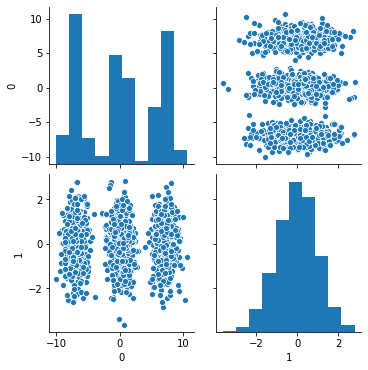

In [356]:
sns.pairplot(pd.DataFrame(pca))

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> The first attribute looks like the 1st original attribute, while the second attribute looks like the third original attribute. I believe this is because most of the variance can be explained by the first original attribute. Below we see i am probably right.

In [358]:
Lambda/sum(Lambda)

array([0.9456064 , 0.02641939, 0.0279742 ])

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

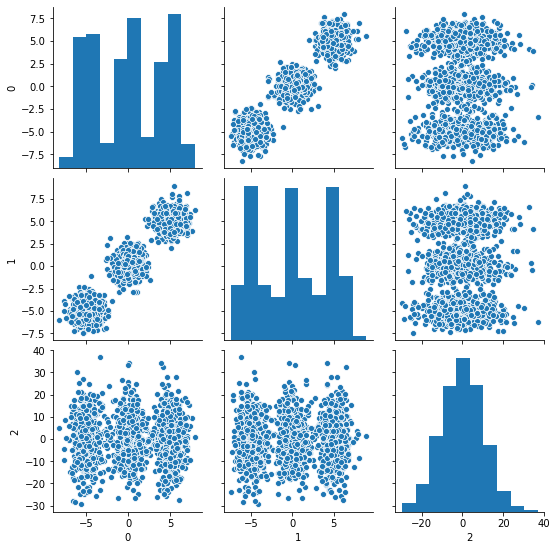

In [359]:
sns.pairplot(Blobs2)

<span style="color:green">Answer:</span> It is indistinguishable from Blobs1, including the characteristics of the third attribute. The only thing that seems to be different is the scales - the variance looks higher

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [378]:
blob = Blobs2.values
cov_matrix = np.dot((blob - blob.mean(axis=0)).T, (blob - blob.mean(axis=0)))
Lambda, v = np.linalg.eig(cov_matrix)
pca = np.matmul(blob, v[:, -2:])

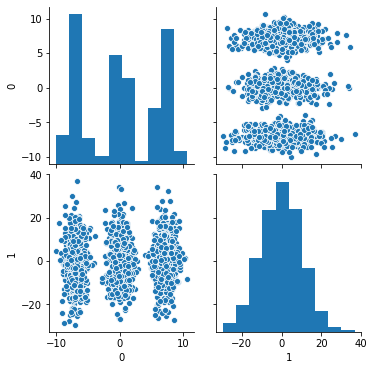

In [379]:
sns.pairplot(pd.DataFrame(pca))

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> After manually ordering the eigenvalues to be in decreasing order (I have no idea why they werent already), it seems that they roughly correspond to the same features as blob1

In [380]:
Lambda[::-1]/sum(Lambda)

array([0.74717324, 0.2459521 , 0.00687466])

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> Yes

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

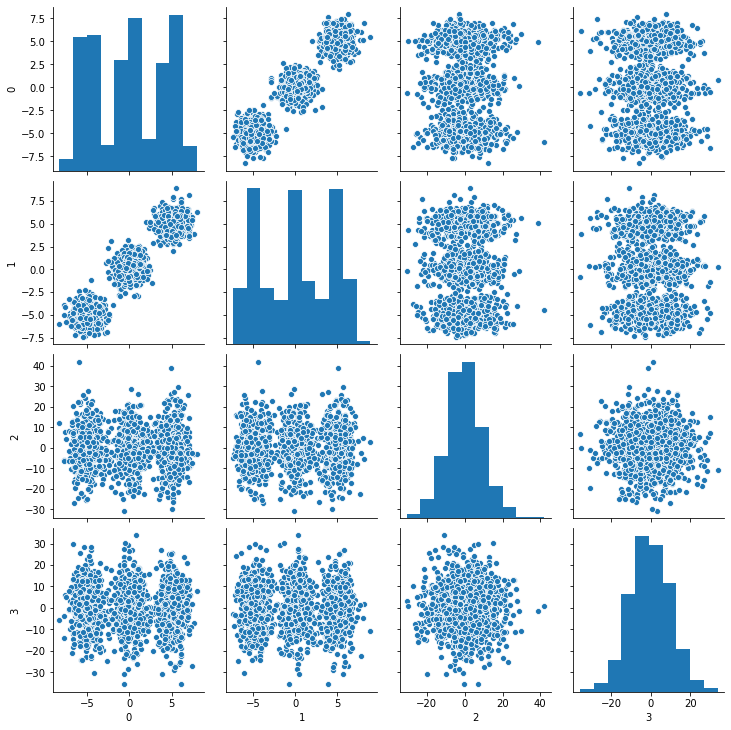

In [382]:
sns.pairplot(Blobs3)

<span style="color:green">Answer:</span> The first two attributes appear highly correlated, while the second two appear uncorrelated

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [395]:
blob = Blobs3.values
cov_matrix = np.dot((blob - blob.mean(axis=0)).T, (blob - blob.mean(axis=0)))
Lambda, v = np.linalg.eig(cov_matrix)
pca = np.matmul(blob, v[::-1][:, :2])

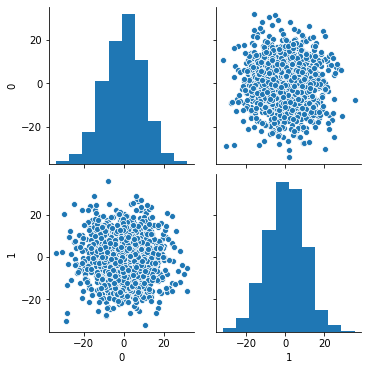

In [396]:
sns.pairplot(pd.DataFrame(pca))

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> The last one/two, which are bad. I had to manually inspect the variances of the original data to figure out why this happens - PCA maximizes variance after a projection, and there is much larger variance in the last two features than in the first two, which are useful for classificiation.

In [398]:
Blobs3.var()

0     17.570371
1     17.643028
2     91.896992
3    104.644324
dtype: float64

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> Absolutely not, i believe what is responsible for this is the high variance in the last two attributes which are non-separable, as mentioned above

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span> If your most separable features have the lowest variance, you will lose lots of separability.

I actually did not know this until i did this assignment, and it feels like one of the most important conclusions of PCA

### 8. Singular Value Decomposition

<span style="color:green"> **(Optional)** </span> <span style="color:red">Question 8a: </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

<span style="color:green"> **(Optional)** </span>  <span style="color:red">Question 8b: </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [ ]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [399]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [400]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

<BarContainer object of 4 artists>

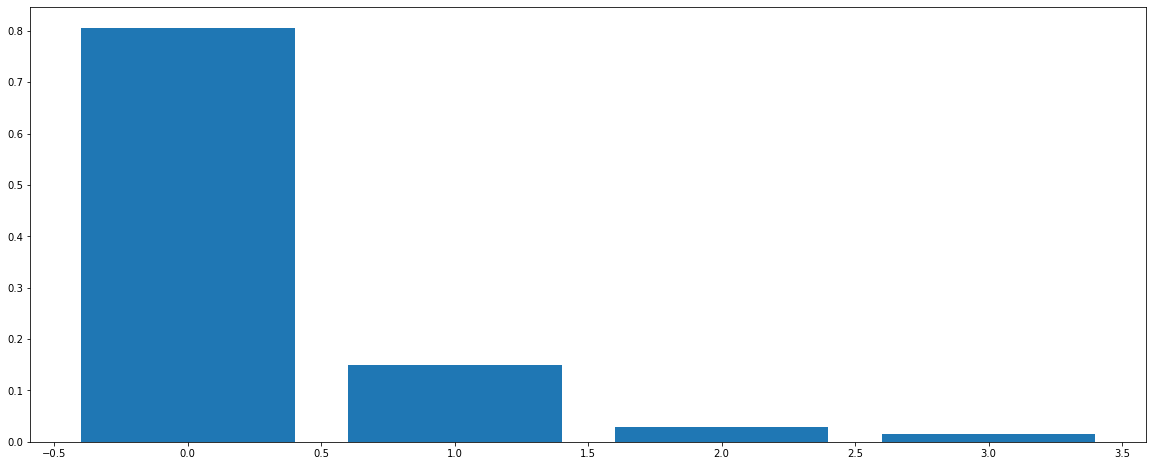

In [410]:
U, S, V = svd(data)
plt.bar(np.arange(4), S/sum(S))

<span style="color:green">Answer:</span> The last two

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

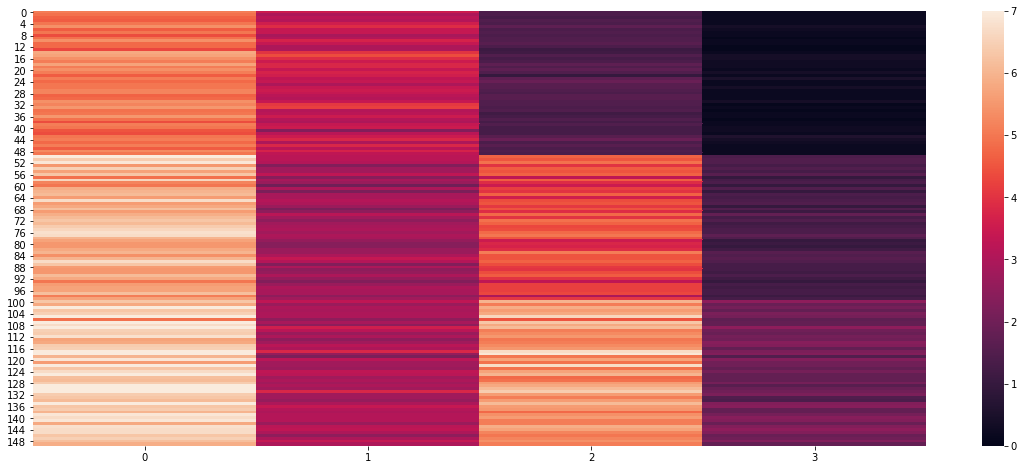

In [411]:
sns.heatmap(data,vmin=0, vmax=7)

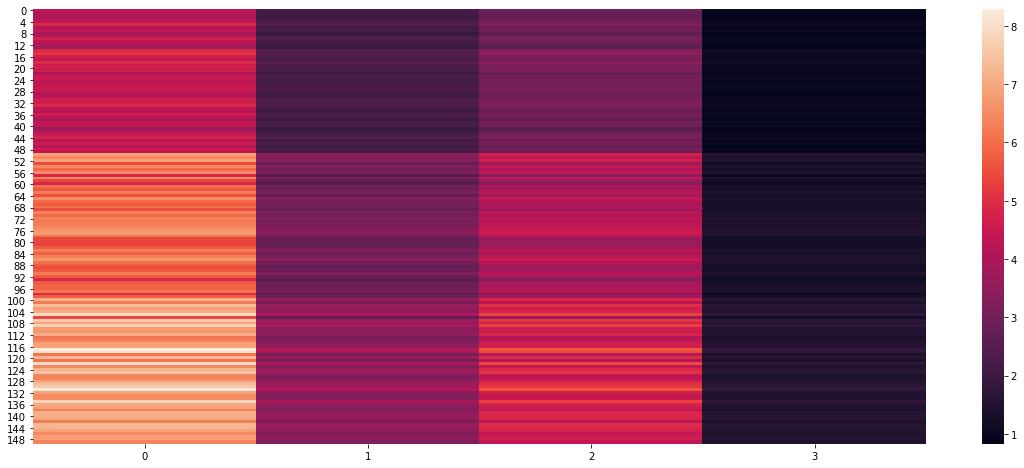

In [412]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

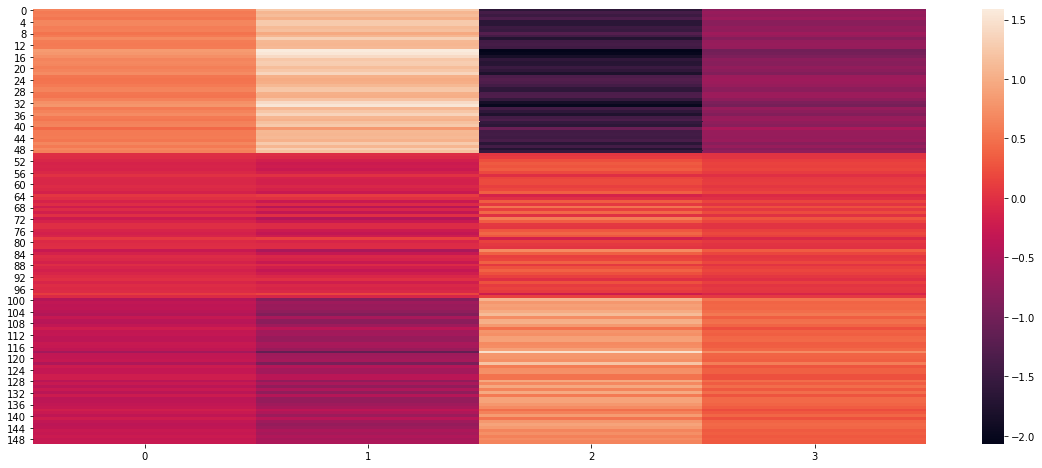

In [413]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

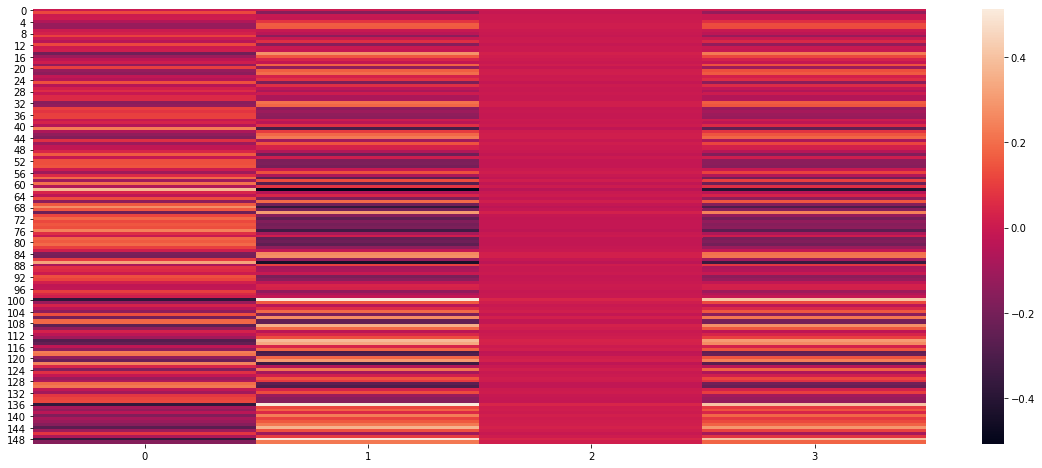

In [414]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

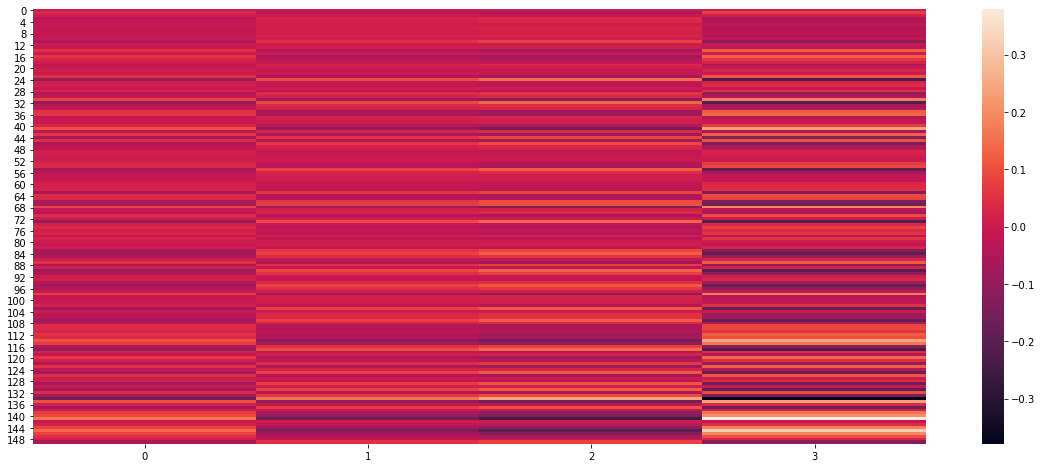

In [415]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> The first one seems to have the largest magnitudes, and the second one seems to have the next largest, while the last two are comparable. I believe this is because most of the variance is captured in the first two

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [416]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [417]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [418]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [419]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [420]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [ ]:
X

In [ ]:
X.shape

In [ ]:
y

In [ ]:
y.shape

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and comment which among attributes 43 and 45 can separate the 3s from 8s better.

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

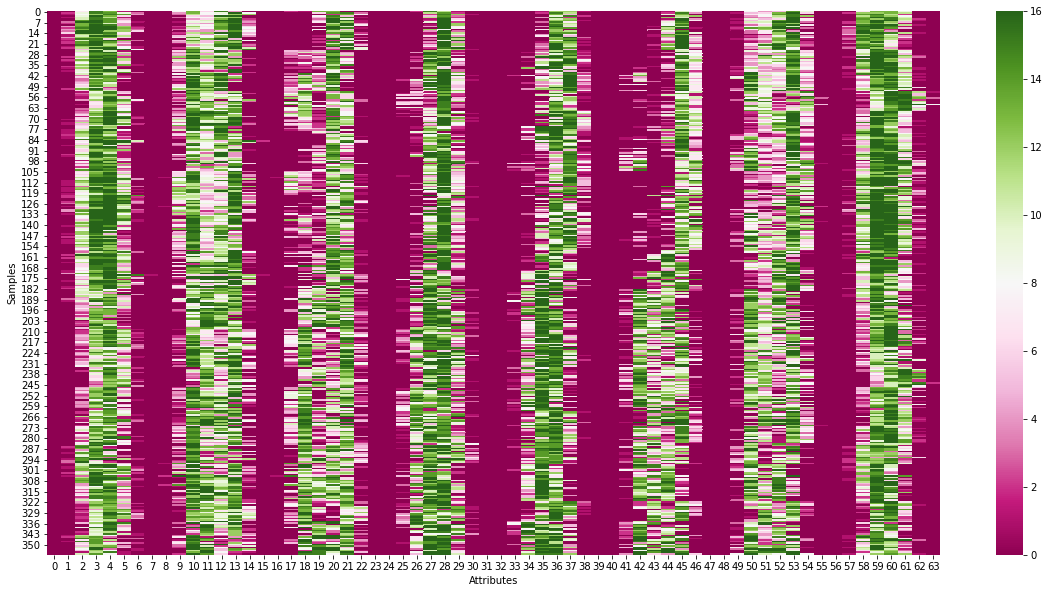

In [421]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span> Attribute 47 is just zeros, whereas attribute 45 is not, so it will be more useful

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment if the resultant projection is better than the best attribute between 43 and 45.

In [425]:
X.shape

(357, 64)

In [437]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r1 = lda.fit(X[:,0:2], y).transform(X[:,0:2])

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

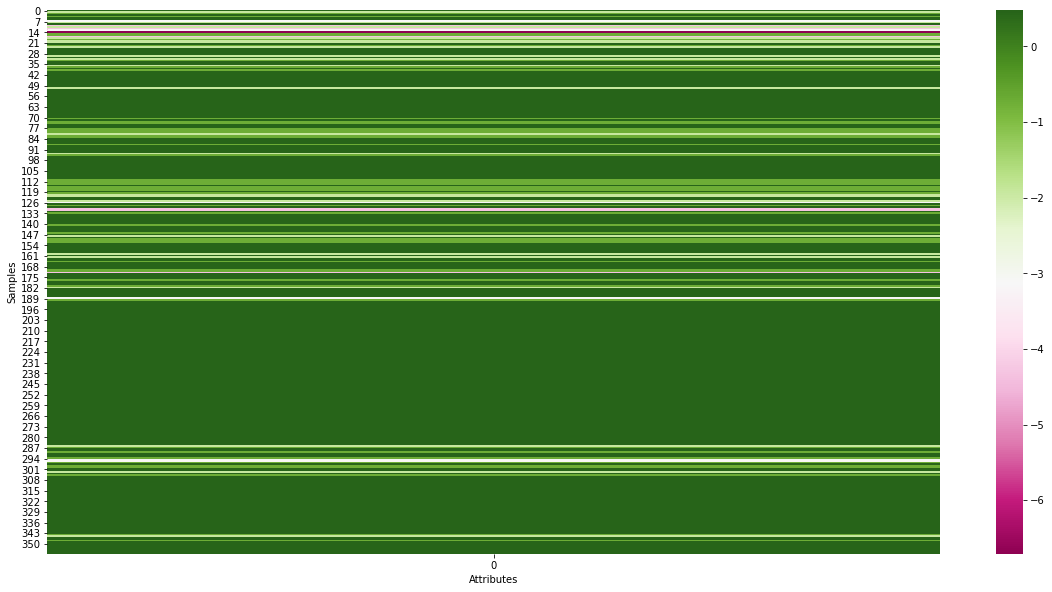

In [436]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

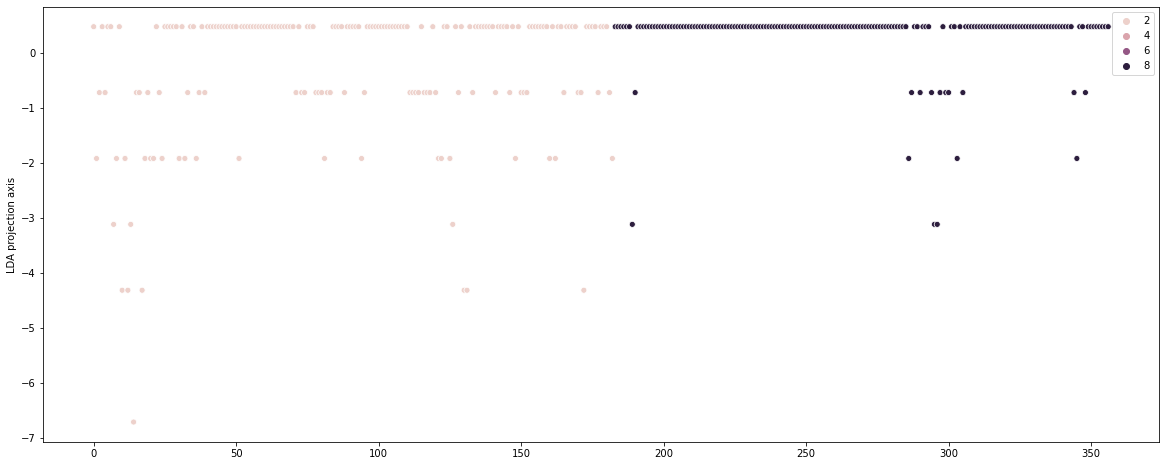

In [434]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)

<span style="color:green">Answer:</span>